## Task 4: A/B Testing Analysis
#### Conducting an A/B testing analysis to evaluate the impact of a change or intervention and analyzing the results using statistical techniques to draw actionable insights.

In [1]:
import pandas as pd
import numpy as np

# Creating simple data of conversion rates for two groups
np.random.seed(42)
data = {
    'Group': ['A'] * 1000 + ['B'] * 1000,
    'Conversion': np.concatenate([
        np.random.binomial(n=1, p=0.15, size=1000),
        np.random.binomial(n=1, p=0.18, size=1000)   
    ])
}

df = pd.DataFrame(data)
df.head()

,Group,Conversion
0,A,0
1,A,1
2,A,0
3,A,0
4,A,0


### Descriptive Statistics

In [2]:
from scipy import stats

group_stats = df.groupby('Group')['Conversion'].agg(['mean', 'std', 'count'])
group_stats

,mean,std,count
Group,,,
A,0.153,0.360168,1000
B,0.178,0.382704,1000


### Performing t-test

In [3]:
group_A = df[df['Group'] == 'A']['Conversion']
group_B = df[df['Group'] == 'B']['Conversion']
t_stat, p_value = stats.ttest_ind(group_A, group_B)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

T-statistic: -1.504
P-value: 0.133


### Visualizing the results

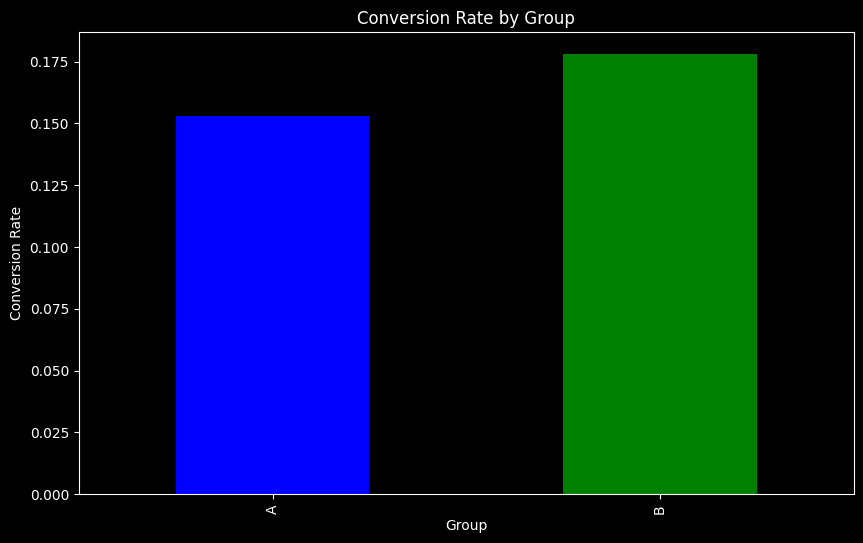

In [4]:
# Visualization
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
df.groupby('Group')['Conversion'].mean().plot(kind='bar', color=['blue', 'green'])
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Group')
plt.show()

### Interpreting the results

In [5]:
alpha = 0.05  # Significance level
if p_value < alpha:
    print(f"The difference between groups is statistically significant (p < {alpha}).")
else:
    print(f"The difference between groups is not statistically significant (p >= {alpha}).")

The difference between groups is not statistically significant (p >= 0.05).
